In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

In [5]:
url = 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'
page=requests.get(url)
page.status_code

403

In [6]:
url = "https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
    'Referer': 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'}
page= requests.get(url, headers=headers)
page.status_code

200

In [7]:
soup=BeautifulSoup(page.text,features="html.parser")

In [8]:
#soup

In [9]:
number_of_companies=soup.find_all('div',class_='companyCardWrapper')
len(number_of_companies)

20

In [10]:
company_names=[]
for i in soup.find_all("h2",class_="companyCardWrapper__companyName"):
    company_names.append(i.text.strip())
print(company_names)
print()
print(len(company_names))

['TCS', 'Accenture', 'Wipro', 'Cognizant', 'Capgemini', 'HDFC Bank', 'Infosys', 'ICICI Bank', 'HCLTech', 'Tech Mahindra', 'Genpact', 'Teleperformance', 'Axis Bank', 'Concentrix Corporation', 'Jio', 'Amazon', 'iEnergizer', 'Reliance Retail', 'IBM', 'LTIMindtree']

20


In [11]:
rating=[]
for i in soup.find_all("div",class_="rating_text rating_text--md"):
    rating.append(i.text.strip())
print(rating)
print()
print(len(rating))

['3.4', '3.7', '3.7', '3.7', '3.7', '3.8', '3.5', '4.0', '3.4', '3.4', '3.6', '3.8', '3.6', '3.6', '4.3', '4.0', '4.6', '3.9', '3.9', '3.6']

20


In [12]:
reviews=[]
for i in soup.find_all("span",class_="companyCardWrapper__companyRatingCount"):
    reviews.append(i.text.strip())
print(reviews)
print(len(reviews))

['(1.1L)', '(68k)', '(61k)', '(57.9k)', '(49.6k)', '(48k)', '(45.5k)', '(43.7k)', '(42.6k)', '(40.8k)', '(39.1k)', '(35k)', '(30.9k)', '(30.4k)', '(29.7k)', '(29.4k)', '(26.9k)', '(26k)', '(24.6k)', '(24.2k)']
20


In [13]:
all=[]
for i in soup.find_all("a",class_="companyCardWrapper__ActionWrapper"):
    all.append(i.text.strip())
print(all)

['1.1L Reviews', '9.5L Salaries', '11.6k Interviews', '640 Jobs', '10.6k Benefits', '87 Photos', '68k Reviews', '6.3L Salaries', '8.9k Interviews', '22.3k Jobs', '6.7k Benefits', '48 Photos', '61k Reviews', '4.6L Salaries', '6.4k Interviews', '5.3k Jobs', '4.6k Benefits', '99 Photos', '57.9k Reviews', '5.9L Salaries', '6.1k Interviews', '548 Jobs', '5.5k Benefits', '82 Photos', '49.6k Reviews', '4.6L Salaries', '5.3k Interviews', '1.7k Jobs', '3.6k Benefits', '41 Photos', '48k Reviews', '1.5L Salaries', '2.7k Interviews', '149 Jobs', '3.2k Benefits', '70 Photos', '45.5k Reviews', '5.1L Salaries', '8.2k Interviews', '3k Jobs', '4.8k Benefits', '117 Photos', '43.7k Reviews', '1.5L Salaries', '2.8k Interviews', '6 Jobs', '3.7k Benefits', '69 Photos', '42.6k Reviews', '3.6L Salaries', '4.3k Interviews', '245 Jobs', '3.8k Benefits', '64 Photos', '40.8k Reviews', '2.8L Salaries', '4.4k Interviews', '499 Jobs', '3.4k Benefits', '79 Photos', '39.1k Reviews', '2.2L Salaries', '3.6k Interviews',

In [14]:
company_type=[]
for i in soup.find_all("span",class_="companyCardWrapper__interLinking"):
    company_type.append(i.text.strip())
print(company_type)

['IT Services & Consulting | Bangalore / Bengaluru +432 other locations', 'IT Services & Consulting | Bangalore / Bengaluru +245 other locations', 'IT Services & Consulting | Hyderabad / Secunderabad +367 other locations', 'IT Services & Consulting | Hyderabad / Secunderabad +225 other locations', 'IT Services & Consulting | Bangalore / Bengaluru +180 other locations', 'Banking | Mumbai +1782 other locations', 'IT Services & Consulting | Bangalore / Bengaluru +239 other locations', 'Banking | Mumbai +1417 other locations', 'IT Services & Consulting | Chennai +223 other locations', 'IT Services & Consulting | Hyderabad / Secunderabad +328 other locations', 'IT Services & Consulting | Hyderabad / Secunderabad +174 other locations', 'BPO | Mumbai +251 other locations', 'Banking | Mumbai +1481 other locations', 'BPO | Bangalore / Bengaluru +175 other locations', 'Telecom | Mumbai +1787 other locations', 'Internet | Bangalore / Bengaluru +512 other locations', 'BPO | Noida +49 other locatio

In [15]:
for i in range(1,100):   #multi page idea
    url= f'page{i}'

In [16]:
base_url = 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.ambitionbox.com/'
}
company_names = []
ratings = []
reviews_count = []
salary_count = []
interview_count = []
jobs_count = []
locations = []

for page_num in range(1,100):
    url = f"{base_url}&page={page_num}"
    print(f"Scraping page: {page_num}")

    try:
        #response = requests.get(url, headers=headers)
        #response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(page.text, 'html.parser')

        company_cards = soup.find_all('div', class_='companyCardWrapper')

        if not company_cards:
            print(f"No more company cards found on page {page_num}. Exiting loop.")
            break

        for card in company_cards:
            name_tag = card.find('h2', class_='companyCardWrapper__companyName')
            company_names.append(name_tag.text.strip() if name_tag else 'N/A')

            rating_tag = card.find('div', class_='rating_star_container')
            if rating_tag:
                try:
                    ratings.append(float(rating_tag.text.strip()))
                except ValueError:
                    ratings.append('N/A')
            else:
                ratings.append('N/A')

            reviews_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Reviews')
            reviews_count.append(reviews_tag.find_previous_sibling('span').text.strip() if reviews_tag and reviews_tag.find_previous_sibling('span') else 'N/A')

            salaries_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Salaries')
            salary_count.append(salaries_tag.find_previous_sibling('span').text.strip() if salaries_tag and salaries_tag.find_previous_sibling('span') else 'N/A')

            interviews_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Interviews')
            interview_count.append(interviews_tag.find_previous_sibling('span').text.strip() if interviews_tag and interviews_tag.find_previous_sibling('span') else 'N/A')

            jobs_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Jobs')
            jobs_count.append(jobs_tag.find_previous_sibling('span').text.strip() if jobs_tag and jobs_tag.find_previous_sibling('span') else 'N/A')

            location_tag = card.find('span', class_='companyCardWrapper__interLinking')
            locations.append(location_tag.text.strip() if location_tag else 'N/A')


    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error on page {page_num}: {e}")
        print("Stopping scraping due to HTTP error.")
        break
    except requests.exceptions.RequestException as e:
        print(f"Request Error on page {page_num}: {e}")
        print("Stopping scraping due to network/request error.")
        break
    except Exception as e:
        print(f"An unexpected error occurred on page {page_num}: {e}")
        print("Stopping scraping due to an unexpected error.")
        break


Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7
Scraping page: 8
Scraping page: 9
Scraping page: 10
Scraping page: 11
Scraping page: 12
Scraping page: 13
Scraping page: 14
Scraping page: 15
Scraping page: 16
Scraping page: 17
Scraping page: 18
Scraping page: 19
Scraping page: 20
Scraping page: 21
Scraping page: 22
Scraping page: 23
Scraping page: 24
Scraping page: 25
Scraping page: 26
Scraping page: 27
Scraping page: 28
Scraping page: 29
Scraping page: 30
Scraping page: 31
Scraping page: 32
Scraping page: 33
Scraping page: 34
Scraping page: 35
Scraping page: 36
Scraping page: 37
Scraping page: 38
Scraping page: 39
Scraping page: 40
Scraping page: 41
Scraping page: 42
Scraping page: 43
Scraping page: 44
Scraping page: 45
Scraping page: 46
Scraping page: 47
Scraping page: 48
Scraping page: 49
Scraping page: 50
Scraping page: 51
Scraping page: 52
Scraping page: 53
Scraping page: 54
Scraping page: 55
Scraping page: 56
S

In [17]:
data={
    'Company Name': company_names,
    'Rating': ratings,
    'Reviews': reviews_count,
    'Salaries': salary_count,
    'Interviews': interview_count,
    'Jobs': jobs_count,
    'Location': locations,
}

In [18]:
df=pd.DataFrame(data)
df

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Location
0,TCS,3.4,1.1L,9.5L,11.6k,640,IT Services & Consulting | Bangalore / Bengalu...
1,Accenture,3.7,68k,6.3L,8.9k,22.3k,IT Services & Consulting | Bangalore / Bengalu...
2,Wipro,3.7,61k,4.6L,6.4k,5.3k,IT Services & Consulting | Hyderabad / Secunde...
3,Cognizant,3.7,57.9k,5.9L,6.1k,548,IT Services & Consulting | Hyderabad / Secunde...
4,Capgemini,3.7,49.6k,4.6L,5.3k,1.7k,IT Services & Consulting | Bangalore / Bengalu...
...,...,...,...,...,...,...,...
1975,Amazon,4.0,29.4k,1.4L,5.6k,1.5k,Internet | Bangalore / Bengaluru +512 other lo...
1976,iEnergizer,4.6,26.9k,23.6k,920,38,BPO | Noida +49 other locations
1977,Reliance Retail,3.9,26k,72.9k,1.8k,91,Retail | Mumbai +1127 other locations
1978,IBM,3.9,24.6k,2.1L,2.5k,1.4k,IT Services & Consulting | Bangalore / Bengalu...


In [19]:
df['Location'][0]

'IT Services & Consulting | Bangalore / Bengaluru +432 other locations'

In [20]:
data=df
data['Industry']=data['Location'].apply(lambda x:x.split('|')[0] if '|' in x else None)

In [21]:
def extract_primary_city(location_str):
    if ' | ' in location_str:
        parts = location_str.split(' | ')[1]
        city = re.sub(r'\s*\+\d+\s*other locations', '', parts)
        city = city.replace(' / Bengaluru', '').strip()
        return city
    return None
data['Primary_City'] = data['Location'].apply(extract_primary_city)
def extract_num_other_locations(location_str):
    match = re.search(r'\+(\d+)\s*other locations', location_str)
    if match:
        return int(match.group(1))
    return 0

data['Num_Other_Locations'] = data['Location'].apply(extract_num_other_locations)
data['Primary_City'] = data['Primary_City'].replace({'Bangalore': 'Bengaluru', 'Noida': 'Noida'})
data['Industry'].fillna('Unknown', inplace=True)

data.drop('Location', axis=1, inplace=True)

print(data[['Industry', 'Primary_City', 'Num_Other_Locations']].head())

                    Industry              Primary_City  Num_Other_Locations
0  IT Services & Consulting                  Bengaluru                  432
1  IT Services & Consulting                  Bengaluru                  245
2  IT Services & Consulting   Hyderabad / Secunderabad                  367
3  IT Services & Consulting   Hyderabad / Secunderabad                  225
4  IT Services & Consulting                  Bengaluru                  180


**Number of rows and columns**

In [22]:
data.shape

(1980, 9)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         1980 non-null   object 
 1   Rating               1980 non-null   float64
 2   Reviews              1980 non-null   object 
 3   Salaries             1980 non-null   object 
 4   Interviews           1980 non-null   object 
 5   Jobs                 1980 non-null   object 
 6   Industry             1980 non-null   object 
 7   Primary_City         1980 non-null   object 
 8   Num_Other_Locations  1980 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 139.3+ KB


**Data type of each column**

In [24]:
data.dtypes

Company Name            object
Rating                 float64
Reviews                 object
Salaries                object
Interviews              object
Jobs                    object
Industry                object
Primary_City            object
Num_Other_Locations      int64
dtype: object

In [25]:
data.head(10)

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations
0,TCS,3.4,1.1L,9.5L,11.6k,640,IT Services & Consulting,Bengaluru,432
1,Accenture,3.7,68k,6.3L,8.9k,22.3k,IT Services & Consulting,Bengaluru,245
2,Wipro,3.7,61k,4.6L,6.4k,5.3k,IT Services & Consulting,Hyderabad / Secunderabad,367
3,Cognizant,3.7,57.9k,5.9L,6.1k,548,IT Services & Consulting,Hyderabad / Secunderabad,225
4,Capgemini,3.7,49.6k,4.6L,5.3k,1.7k,IT Services & Consulting,Bengaluru,180
5,HDFC Bank,3.8,48k,1.5L,2.7k,149,Banking,Mumbai,1782
6,Infosys,3.5,45.5k,5.1L,8.2k,3k,IT Services & Consulting,Bengaluru,239
7,ICICI Bank,4.0,43.7k,1.5L,2.8k,6,Banking,Mumbai,1417
8,HCLTech,3.4,42.6k,3.6L,4.3k,245,IT Services & Consulting,Chennai,223
9,Tech Mahindra,3.4,40.8k,2.8L,4.4k,499,IT Services & Consulting,Hyderabad / Secunderabad,328


In [26]:
def convert_to_numeric(value):
    if pd.isna(value):
        return None
    s = str(value).strip()
    if 'k' in s:
        return float(s.replace('k', '')) * 1000
    elif 'L' in s:
        return float(s.replace('L', '')) * 100000
    elif ',' in s:
        return float(s.replace(',', ''))
    try:
        return float(s)
    except ValueError:
        return None

columns_to_convert = ['Reviews', 'Salaries', 'Interviews', 'Jobs']
for col in columns_to_convert:
    data[col] = data[col].apply(convert_to_numeric)

data['Num_Other_Locations'] = pd.to_numeric(data['Num_Other_Locations'], errors='coerce').fillna(0).astype(int)


In [27]:
data.to_csv("ambition_box.csv", index=False)

In [28]:
df=pd.read_csv('ambition_box.csv')
df.head(10)

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations
0,TCS,3.4,110000.0,950000.0,11600.0,640.0,IT Services & Consulting,Bengaluru,432
1,Accenture,3.7,68000.0,630000.0,8900.0,22300.0,IT Services & Consulting,Bengaluru,245
2,Wipro,3.7,61000.0,460000.0,6400.0,5300.0,IT Services & Consulting,Hyderabad / Secunderabad,367
3,Cognizant,3.7,57900.0,590000.0,6100.0,548.0,IT Services & Consulting,Hyderabad / Secunderabad,225
4,Capgemini,3.7,49600.0,460000.0,5300.0,1700.0,IT Services & Consulting,Bengaluru,180
5,HDFC Bank,3.8,48000.0,150000.0,2700.0,149.0,Banking,Mumbai,1782
6,Infosys,3.5,45500.0,510000.0,8200.0,3000.0,IT Services & Consulting,Bengaluru,239
7,ICICI Bank,4.0,43700.0,150000.0,2800.0,6.0,Banking,Mumbai,1417
8,HCLTech,3.4,42600.0,360000.0,4300.0,245.0,IT Services & Consulting,Chennai,223
9,Tech Mahindra,3.4,40800.0,280000.0,4400.0,499.0,IT Services & Consulting,Hyderabad / Secunderabad,328


In [29]:
df.tail()

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations
1975,Amazon,4.0,29400.0,140000.0,5600.0,1500.0,Internet,Bengaluru,512
1976,iEnergizer,4.6,26900.0,23600.0,920.0,38.0,BPO,Noida,49
1977,Reliance Retail,3.9,26000.0,72900.0,1800.0,91.0,Retail,Mumbai,1127
1978,IBM,3.9,24600.0,210000.0,2500.0,1400.0,IT Services & Consulting,Bengaluru,159
1979,LTIMindtree,3.6,24200.0,190000.0,3200.0,324.0,IT Services & Consulting,Bengaluru,138


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         1980 non-null   object 
 1   Rating               1980 non-null   float64
 2   Reviews              1980 non-null   float64
 3   Salaries             1980 non-null   float64
 4   Interviews           1980 non-null   float64
 5   Jobs                 1980 non-null   float64
 6   Industry             1980 non-null   object 
 7   Primary_City         1980 non-null   object 
 8   Num_Other_Locations  1980 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 139.3+ KB


**Number of unique categories in each column**

In [31]:
df.nunique()

Company Name           20
Rating                  9
Reviews                20
Salaries               18
Interviews             18
Jobs                   20
Industry                6
Primary_City            5
Num_Other_Locations    20
dtype: int64

**Checking missing values in each column**

In [32]:
df.isnull().any()

Company Name           False
Rating                 False
Reviews                False
Salaries               False
Interviews             False
Jobs                   False
Industry               False
Primary_City           False
Num_Other_Locations    False
dtype: bool

**summary statistics for all the numeric columns**

In [33]:
df.describe()

,Rating,Reviews,Salaries,Interviews,Jobs,Num_Other_Locations
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,3.760000,43165.000000,289150.000000,4366.000000,1989.850000,564.550000
std,0.294013,19659.742618,235150.104309,2697.042409,4822.196767,573.621417
min,3.400000,24200.000000,23600.000000,920.000000,6.000000,49.000000
25%,3.600000,29625.000000,122500.000000,2400.000000,134.500000,178.750000
50%,3.700000,39950.000000,200000.000000,3400.000000,523.500000,248.000000
75%,3.900000,48400.000000,460000.000000,5725.000000,1425.000000,665.750000
max,4.600000,110000.000000,950000.000000,11600.000000,22300.000000,1787.000000


In [34]:
df['Industry']=df['Industry'].astype('category')
df['Primary_City']=df['Primary_City'].astype('category')

In [35]:
df['Jobs']=df['Jobs'].astype('float32')
df['Interviews']=df['Interviews'].astype('float32')
df['Salaries']=df['Salaries'].astype('float32')
df['Reviews']=df['Reviews'].astype('float32')
df['Num_Other_Locations']=df['Num_Other_Locations'].astype('int16')
df['Rating']=df['Rating'].astype('float32')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company Name         1980 non-null   object  
 1   Rating               1980 non-null   float32 
 2   Reviews              1980 non-null   float32 
 3   Salaries             1980 non-null   float32 
 4   Interviews           1980 non-null   float32 
 5   Jobs                 1980 non-null   float32 
 6   Industry             1980 non-null   category
 7   Primary_City         1980 non-null   category
 8   Num_Other_Locations  1980 non-null   int16   
dtypes: category(2), float32(5), int16(1), object(1)
memory usage: 62.4+ KB


**Dealing with missing values**

In [37]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [38]:
df[df['Jobs'].isna()]

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations


In [39]:
df['Jobs'].fillna(0, inplace=True) 

**Getting Columns**

In [40]:
df.columns

Index(['Company Name', 'Rating', 'Reviews', 'Salaries', 'Interviews', 'Jobs',
       'Industry', 'Primary_City', 'Num_Other_Locations'],
      dtype='object')

In [41]:
df.isnull().sum()

Company Name           0
Rating                 0
Reviews                0
Salaries               0
Interviews             0
Jobs                   0
Industry               0
Primary_City           0
Num_Other_Locations    0
dtype: int64

**Identifying Outliers**

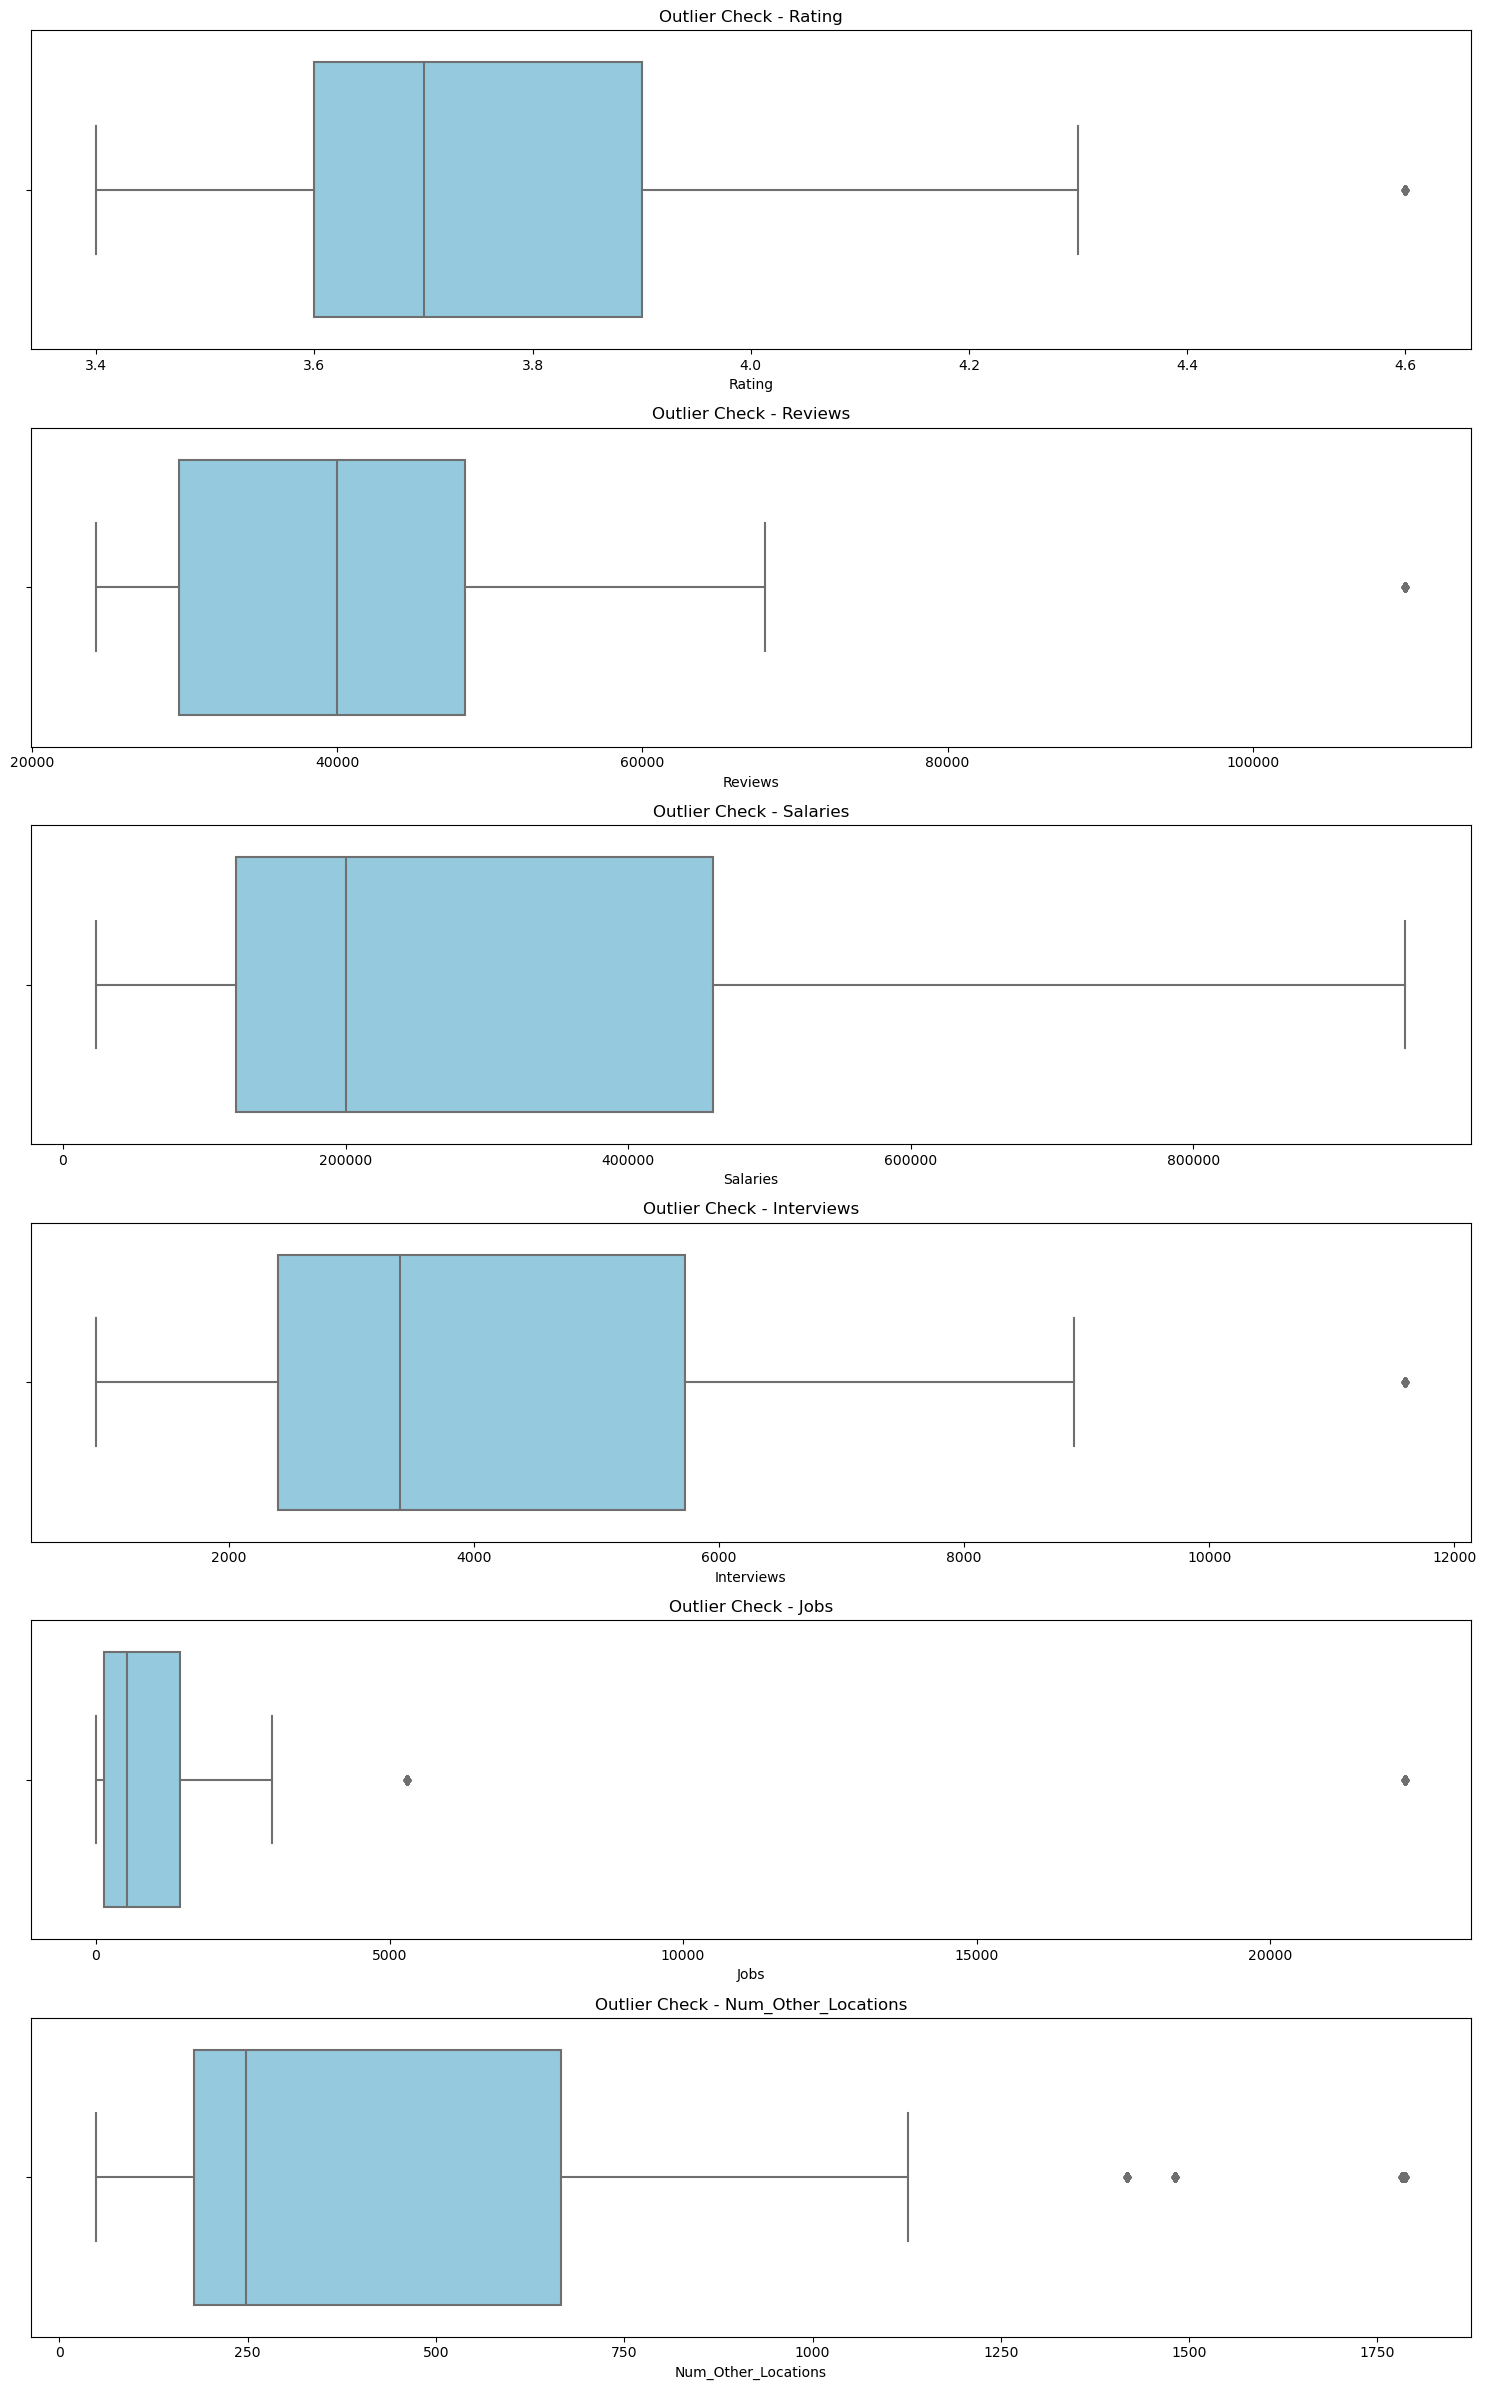

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Setup figure size
plt.figure(figsize=(15, 4 * len(num_cols)))

# Loop through each numeric column
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)  # one row per column
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Outlier Check - {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Handling outliers through Capping**

In [43]:
import numpy as np

# Function to cap outliers using IQR
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Replace values outside bounds with the threshold
    return np.where(series < lower, lower,
           np.where(series > upper, upper, series))

# Apply capping to all numeric columns
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    df[col] = cap_outliers_iqr(df[col])

print("Capping done for numeric columns:", list(num_cols))



Capping done for numeric columns: ['Rating', 'Reviews', 'Salaries', 'Interviews', 'Jobs', 'Num_Other_Locations']


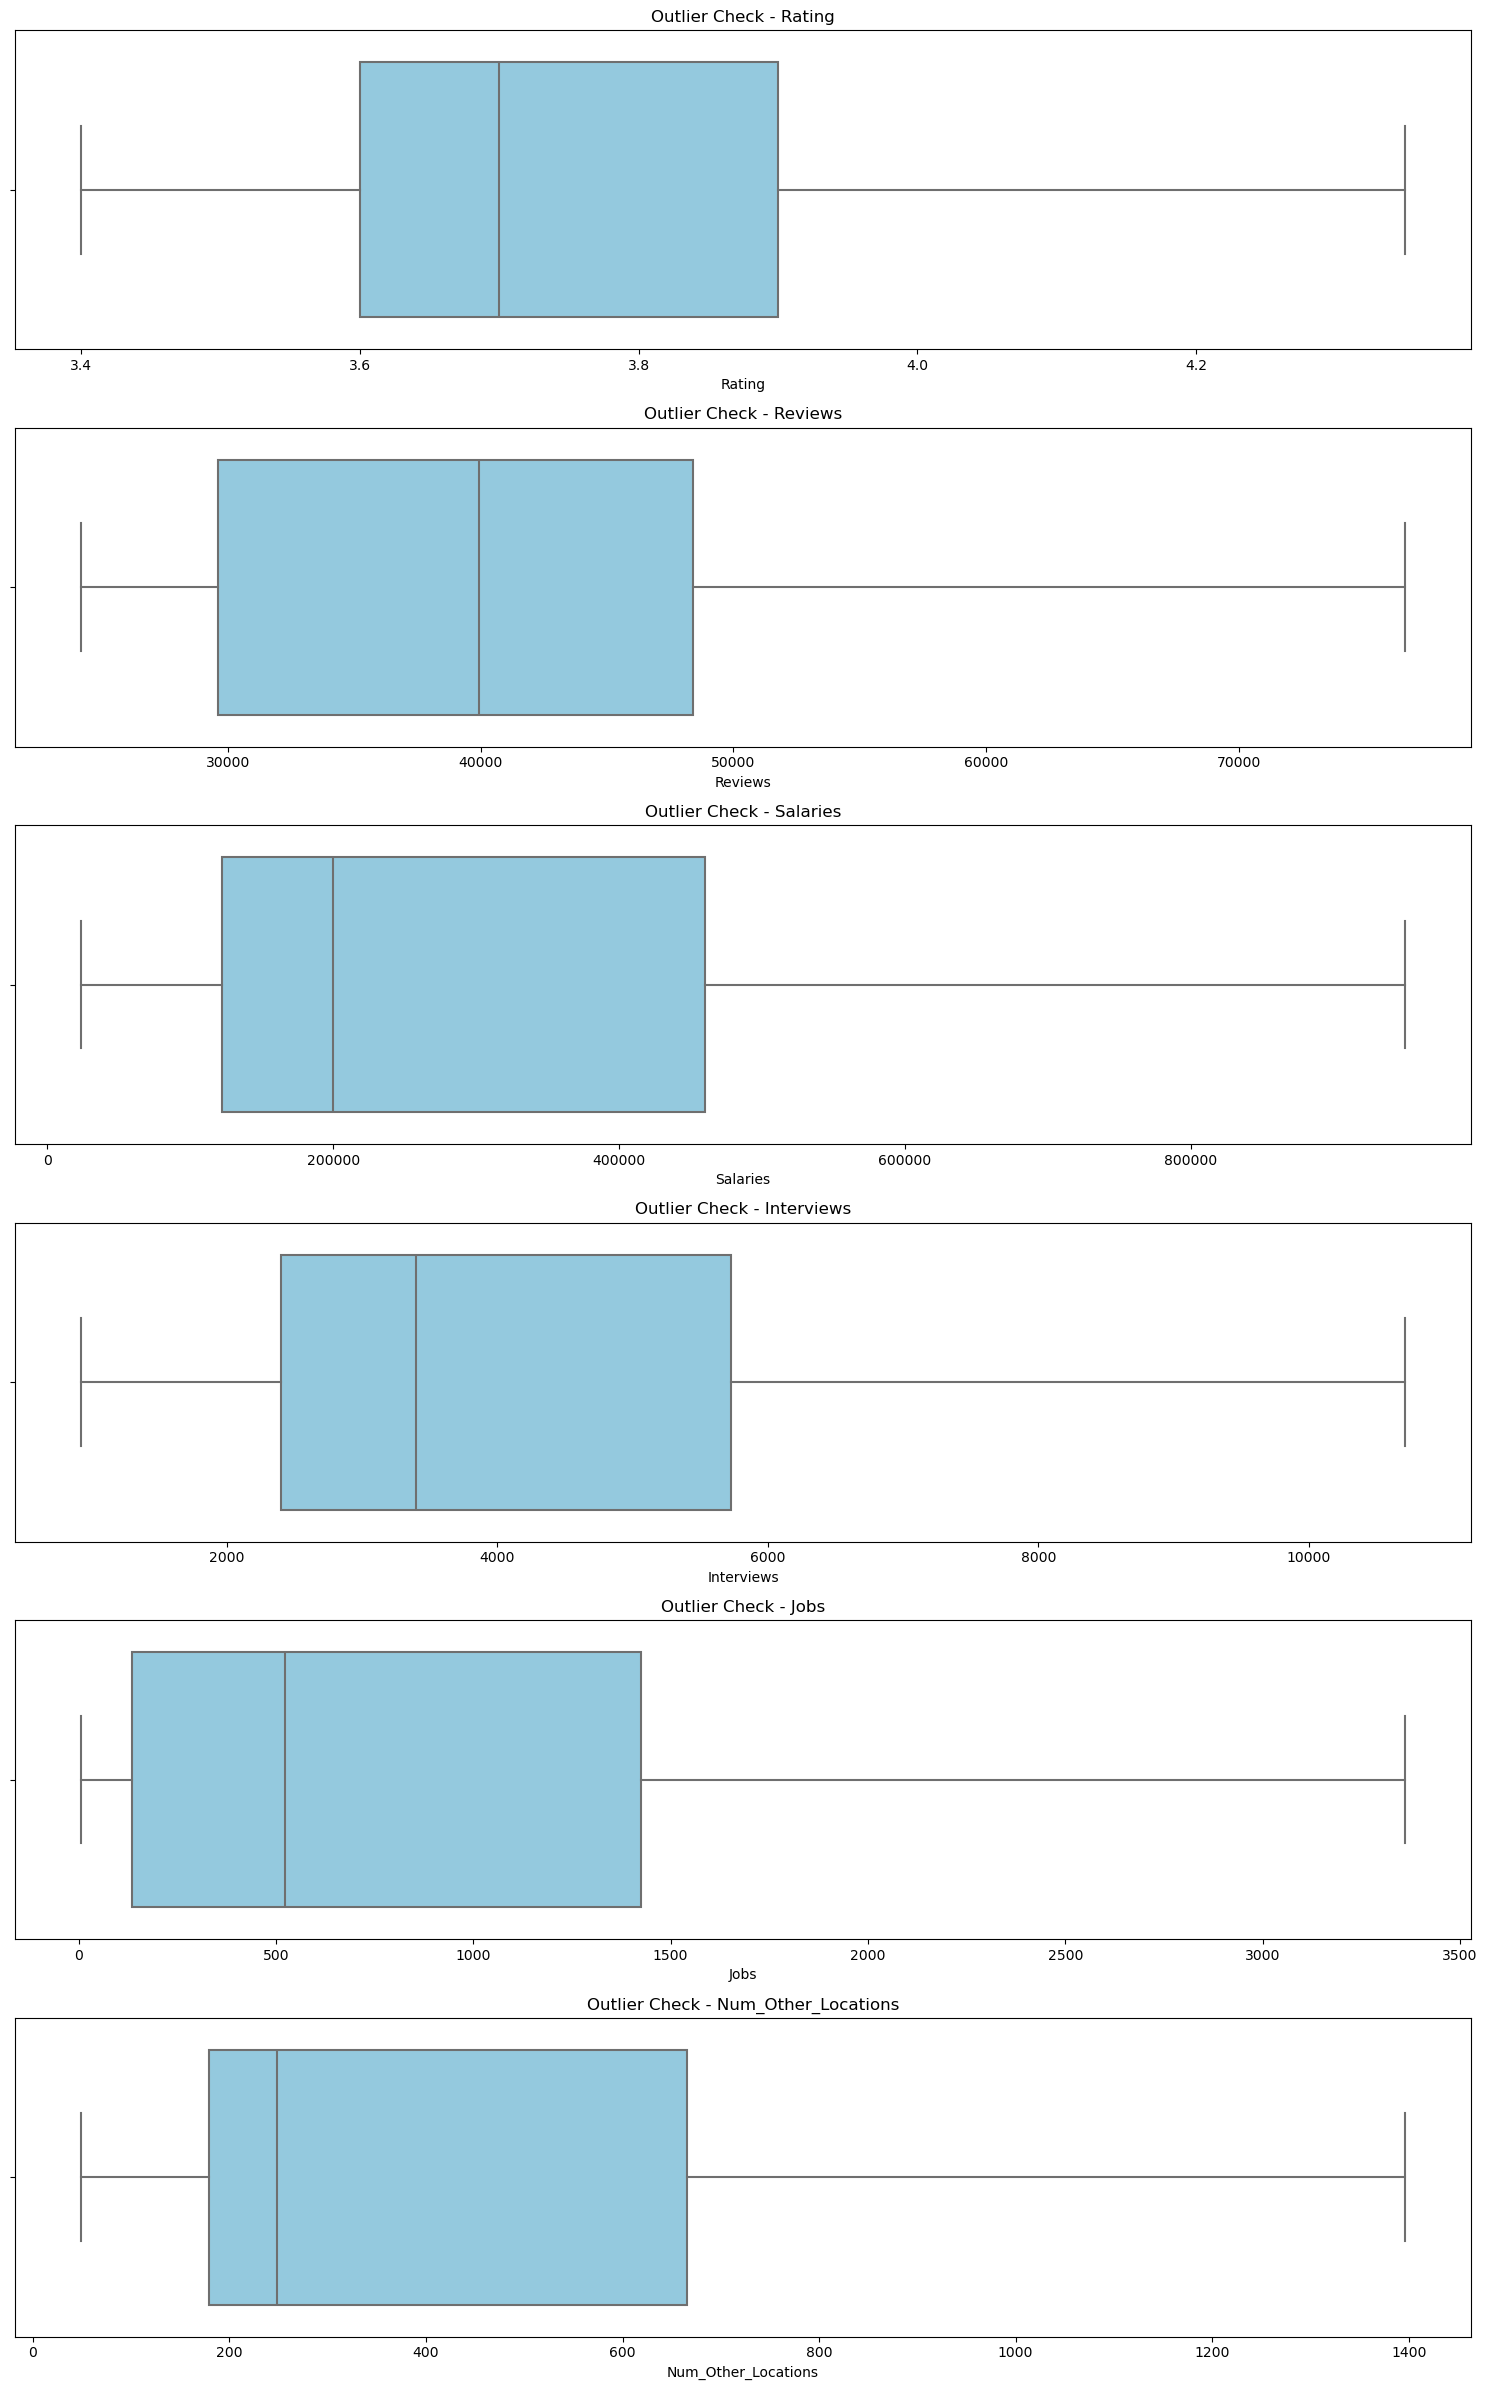

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Setup figure size
plt.figure(figsize=(15, 4 * len(num_cols)))

# Loop through each numeric column
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)  # one row per column
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Outlier Check - {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [45]:
df['Industry'].value_counts()

Industry
IT Services & Consulting     1089
BPO                           297
Banking                       297
Internet                       99
Retail                         99
Telecom                        99
Name: count, dtype: int64

In [46]:
df['Primary_City'].value_counts()

Primary_City
Bengaluru                   792
Mumbai                      594
Hyderabad / Secunderabad    396
Chennai                      99
Noida                        99
Name: count, dtype: int64

In [47]:
df['Company Name'].value_counts()

Company Name
TCS                       99
Accenture                 99
IBM                       99
Reliance Retail           99
iEnergizer                99
Amazon                    99
Jio                       99
Concentrix Corporation    99
Axis Bank                 99
Teleperformance           99
Genpact                   99
Tech Mahindra             99
HCLTech                   99
ICICI Bank                99
Infosys                   99
HDFC Bank                 99
Capgemini                 99
Cognizant                 99
Wipro                     99
LTIMindtree               99
Name: count, dtype: int64

In [48]:
import warnings
warnings.filterwarnings('ignore')

**Univariate Analysis**

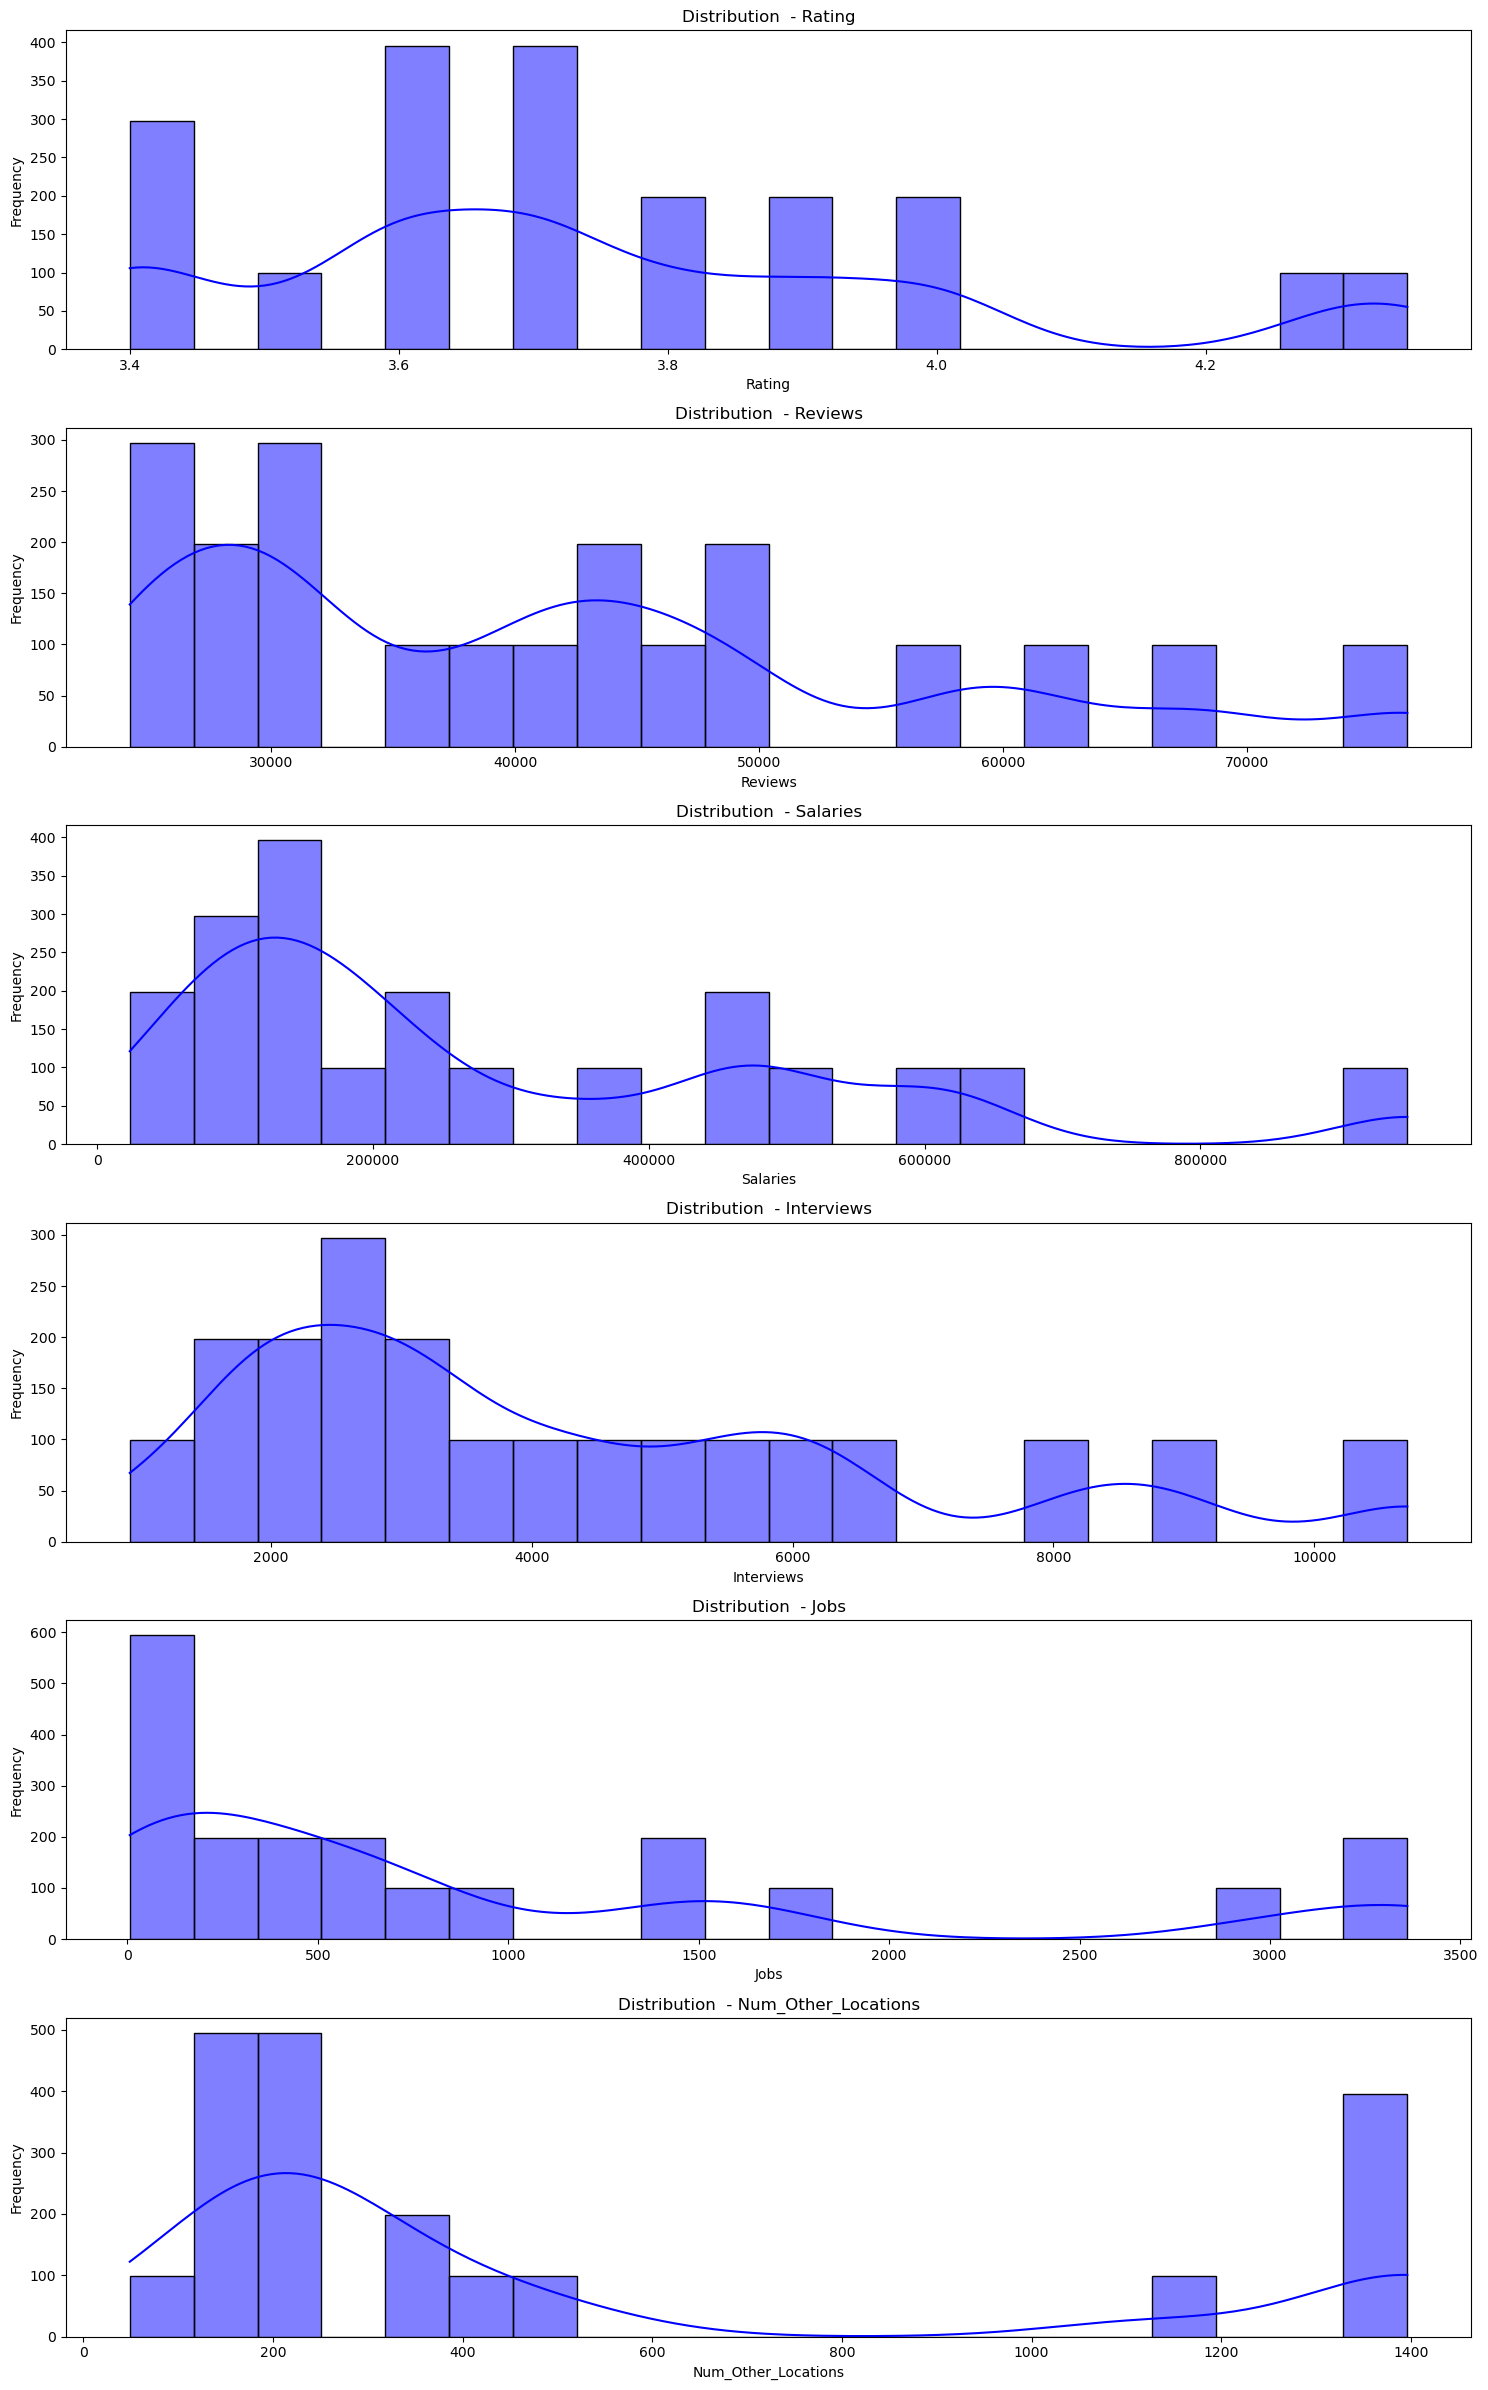

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Plot each numerical column with histogram + KDE
plt.figure(figsize=(15, 4 * len(num_cols)))

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution  - {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Observation**

* **1. Distribution with KDE – Rating**

  * Most ratings fall between 3.4 and 4.
  * The highest frequency (peak) is at 3.2.
  * Very few companies are rated below 3 or above 4.2, suggesting that most companies maintain an average to good reputation.
  * The distribution is right-skewed, indicating fewer companies with ratings above 4.1.

* **2. Distribution with KDE – Reviews**

  * A large cluster of companies have reviews around 25,000–30,000.
  * A few companies stand out with more than 60,000 reviews → likely very large firms with strong visibility.
  * The distribution is right-skewed, showing a long tail of companies with very high reviews.

* **3. Distribution with KDE – Salaries**

  * Most companies have salaries below 200,000 (clear peak on the left side).
  * A few companies show extremely high salary counts (>600,000, \~900,000).
  * The distribution is right-skewed, with a long tail toward high salaries.

* **4. Distribution with KDE – Interviews**

  * Most companies have 2,000–3,000 interviews.
  * A few companies exceed 8,000–10,000 interviews.
  * The distribution is right-skewed, indicating only a small number of companies have more than 8,000 interviews.

* **5. Distribution with KDE – Jobs**

  * Most companies have fewer than 500 jobs.
  * A few companies have more than 2,000 jobs.
  * The distribution is highly right-skewed.

* **6. Distribution with KDE – Num\_Other\_Locations**

  * Most companies have 100–400 other locations.
  * A few companies spike around 1,400, indicating global or multi-branch presence.
  * The distribution is right-skewed, showing that only a few companies are highly globalized with very large branch networks.

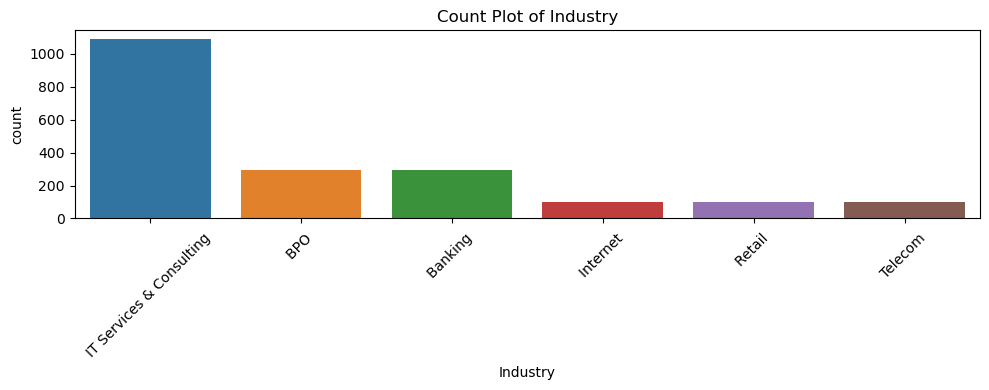

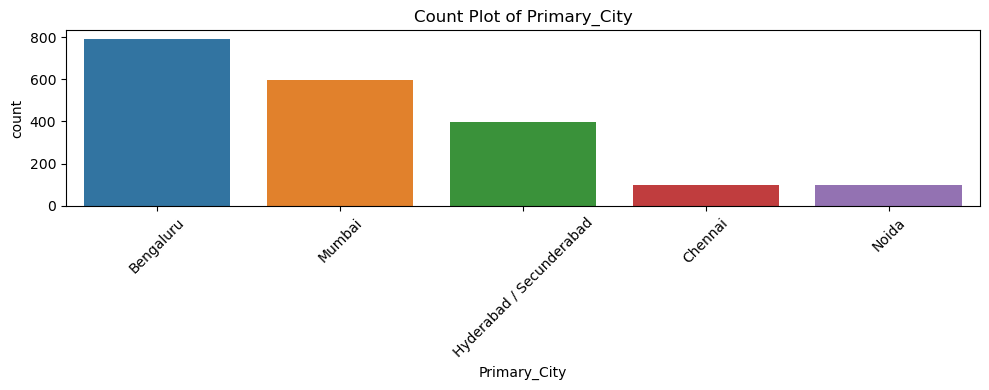

In [50]:
cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

**Observation**

* **Count plot of Industry**

   * IT Services & Consulting dominates with the highest count, indicating it is the most represented industry in the dataset.

   * BPO & Banking come next, but with significantly fewer entries.

   * Internet, Retail, and Telecom have the lowest counts.

* **Count plot of Primary City**

   * Bengaluru leads with the highest number of records, followed by Mumbai and Hyderabad/Secunderabad.

   * Chennai & Noida have the lowest counts in this dataset.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company Name         1980 non-null   object  
 1   Rating               1980 non-null   float32 
 2   Reviews              1980 non-null   float32 
 3   Salaries             1980 non-null   float32 
 4   Interviews           1980 non-null   float32 
 5   Jobs                 1980 non-null   float32 
 6   Industry             1980 non-null   category
 7   Primary_City         1980 non-null   category
 8   Num_Other_Locations  1980 non-null   float64 
dtypes: category(2), float32(5), float64(1), object(1)
memory usage: 74.0+ KB


**Top 10 companies By Reviews**

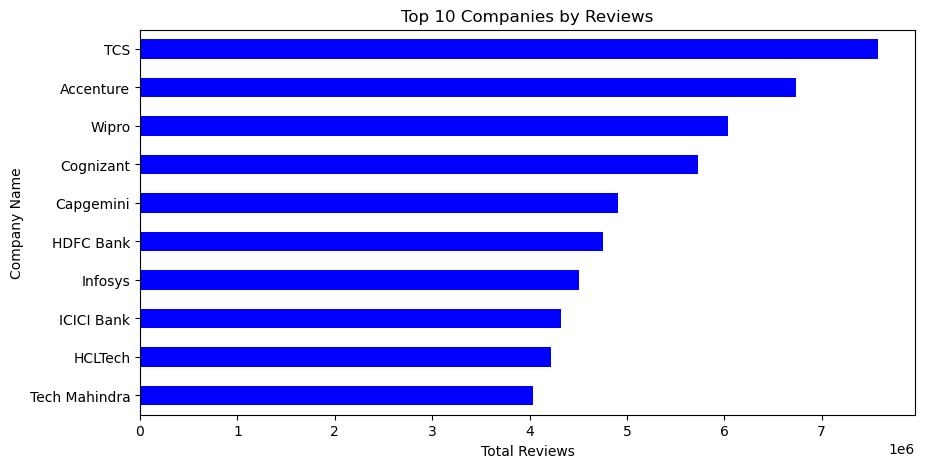

In [52]:
top_reviews = df.groupby('Company Name')['Reviews'].sum().sort_values(ascending=False).head(10)
top_reviews.plot(kind='barh', figsize=(10, 5), color='Blue')
plt.title("Top 10 Companies by Reviews")
plt.xlabel("Total Reviews")
plt.gca().invert_yaxis()
plt.show()

**Observation on Top 10 companies By Reviews**
 * TCS has the highest number of reviews, indicating that it has a large number of employees or actively participates in reviews.

 * Accenture and Wipro also have a high number of reviews, but fewer compared to TCS.

 * Cognizant, Capgemini, Infosys, HCLTech, and Tech Mahindra are also in the top 10, indicating that they are highly reviewed as well.

 * Apart from IT companies, HDFC Bank and ICICI Bank also appear in the top 10, showing that finance companies receive a significant number of reviews     too.

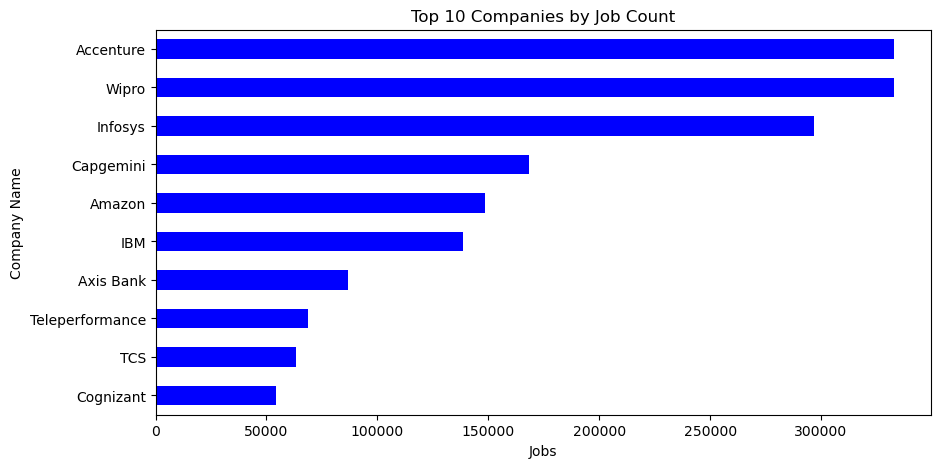

In [53]:
top_jobs = df.groupby('Company Name')['Jobs'].sum().sort_values(ascending=False).head(10)
top_jobs.plot(kind='barh', figsize=(10,5), color='Blue')
plt.title("Top 10 Companies by Job Count")
plt.xlabel("Jobs")
plt.gca().invert_yaxis()
plt.show()

**Observation on Top 10 Companies by jobs**

 * Accenture and Wipro have the highest number of job counts, which means they have the most openings.

 * IBM, Amazon, Capgemini, and Infosys also have a good number of job counts.

 * Axis Bank and Teleperformance are also in the top 10, indicating high recruitment in the Banking and Telecom sectors.

 * Tech Mahindra and LTIMindtree are also in the top 10 but show comparatively lower recruitment with fewer job openings.

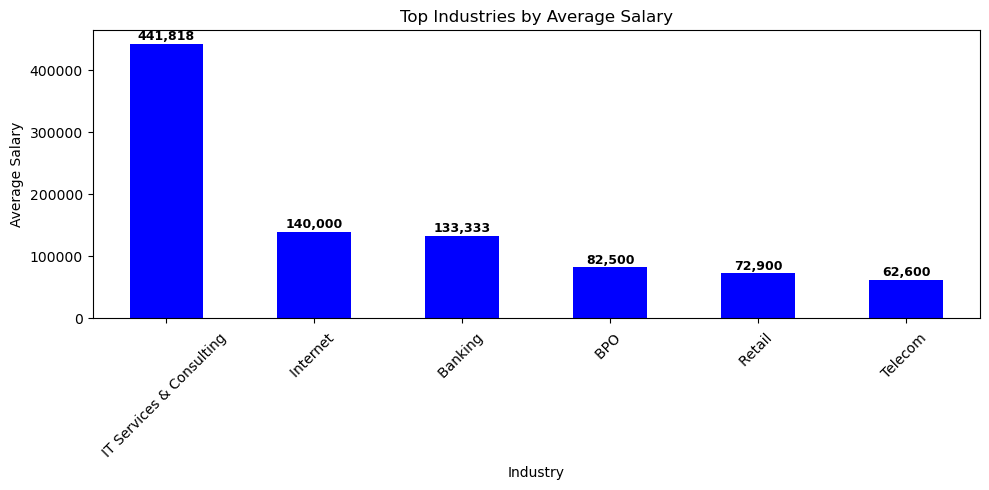

In [54]:
industry_salary = df.groupby('Industry')['Salaries'].mean().sort_values(ascending=False)
a=industry_salary.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Top Industries by Average Salary")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

for i, v in enumerate(industry_salary):
    a.text(i, v + 1000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

**Observation on Top Industries by Average Salary**

  **IT Services & Consulting leads**

   * This industry has the highest average salary, with a substantial margin of 433,636.

  **Banking and Internet Industries Follows**

  * Internet and Banking have approximately the same average salary.

  * However, both are much lower compared to IT Services & Consulting.

  **BPO, Retail & Telecom**

  * These industries have lower average salaries.

  * All are below 100,000 units, with Telecom showing the lowest among the displayed industries.

**Total Job Openings by Primary City**

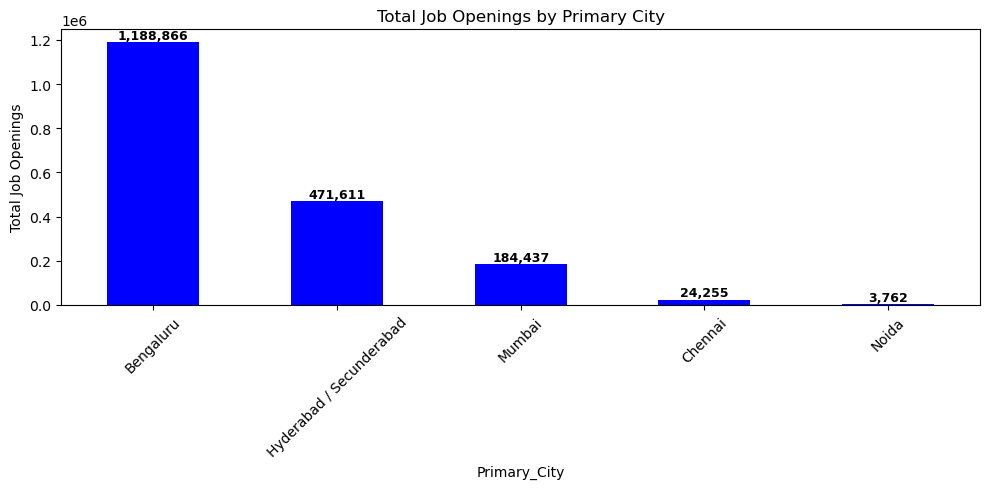

In [55]:
jobs_by_city = df.groupby('Primary_City')['Jobs'].sum().sort_values(ascending=False)

a = jobs_by_city.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Total Job Openings by Primary City")
plt.ylabel("Total Job Openings")
plt.xticks(rotation=45)

for i, v in enumerate(jobs_by_city):
    a.text(i, v + 1000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**Observation on Total Job Openings by Primary City**

 * Bengaluru has the highest number of job openings, i.e., 1.56 million, making it the top city for employment opportunities.

 * Mumbai has around 171,468 openings, which is much lower than Bengaluru.

 * Hyderabad/Secunderabad has 117,711 job openings, which is competing closely with Mumbai.

 * Chennai has fewer job opportunities, i.e., 28,809, compared to Hyderabad/Secunderabad and Mumbai.

 * Noida has the least number of job opportunities among all cities, i.e., 5,346.

In [56]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Num_Other_Locations'], dtype='object')

In [57]:
df['Jobs'].unique()[:20]   # check first 20 unique values

array([ 640.  , 3360.75,  548.  , 1700.  ,  149.  , 3000.  ,    6.  ,
        245.  ,  499.  ,  356.  ,  696.  ,  878.  ,   84.  ,   43.  ,
       1500.  ,   38.  ,   91.  , 1400.  ,  324.  ], dtype=float32)

In [58]:
# Example: clean 'Jobs' column
df['Jobs'] = pd.to_numeric(df['Jobs'], errors='coerce')

# Do the same for others if needed
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Salaries'] = pd.to_numeric(df['Salaries'], errors='coerce')
df['Interviews'] = pd.to_numeric(df['Interviews'], errors='coerce')


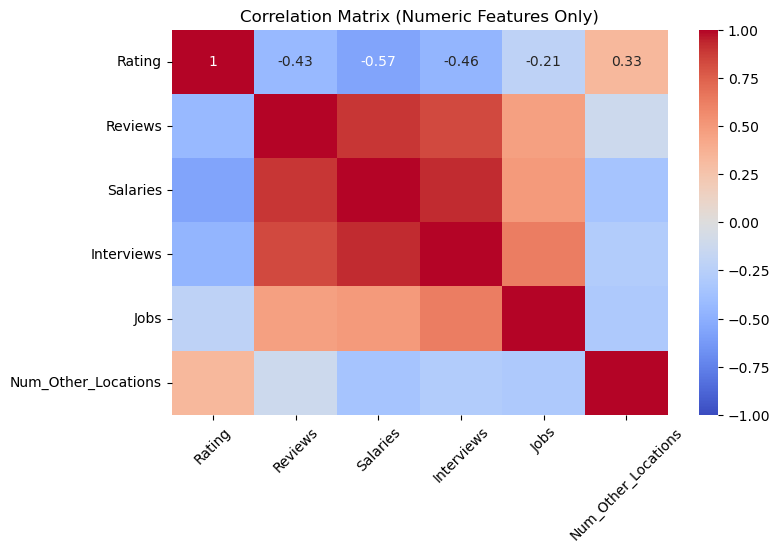

In [59]:
num_df = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(8,5))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()
